ANÁLISIS EXPLORATORIO DE LOS DATOS

In [13]:
# Cargar librerías
import pandas as pd  # Manejo de dataframes

In [25]:
# import funciones  # Funciones para el proyecto

# Cargar datos con funciones
# funciones.sql_to_pd(ruta="data/df.db", df="df")

NameError: name 'pd' is not defined

In [42]:
# Cargar datos de sqlite3
import sqlite3

conn = sqlite3.connect("data/df.db")  # Conectar a la base de datos (ruta)
df = pd.read_sql_query("SELECT * FROM df", conn)  # Leer la tabla df
conn.close()  # Cerrar la conexión
df.head()  # Mostrar las primeras 5 filas

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,mean_time,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,target,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,...,7.373651,3.0,4.0,2.0,3,3,0,None,No,No
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,...,7.718969,3.0,2.0,4.0,2,4,1,2016-10-15 00:00:00,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,...,7.013240,2.0,2.0,1.0,3,3,0,None,No,No
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,...,7.193678,4.0,4.0,3.0,2,3,0,None,No,No
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,...,8.006175,4.0,1.0,3.0,3,3,0,None,No,No


In [48]:
######################################### QUERYS SQL #########################################

# Promedio de ambiente laboral por departamento
conn = sqlite3.connect("data/df.db")  # Conectar a la base de datos + ruta
pd.read_sql_query(
    "SELECT Department, AVG(EnvironmentSatisfaction) FROM df GROUP BY Department",
    conn,
)  # Leer la tabla df

,Department,AVG(EnvironmentSatisfaction)
0,Human Resources,2.823529
1,Research & Development,2.717246
2,Sales,2.722600


In [49]:
# Promedio de ingresos por genero y departamento
pd.read_sql_query(
    "SELECT Gender, AVG(MonthlyIncome) FROM df GROUP BY Gender", conn
)  # Leer la tabla df

,Gender,AVG(MonthlyIncome)
0,Female,64669.424829
1,Male,65324.017517


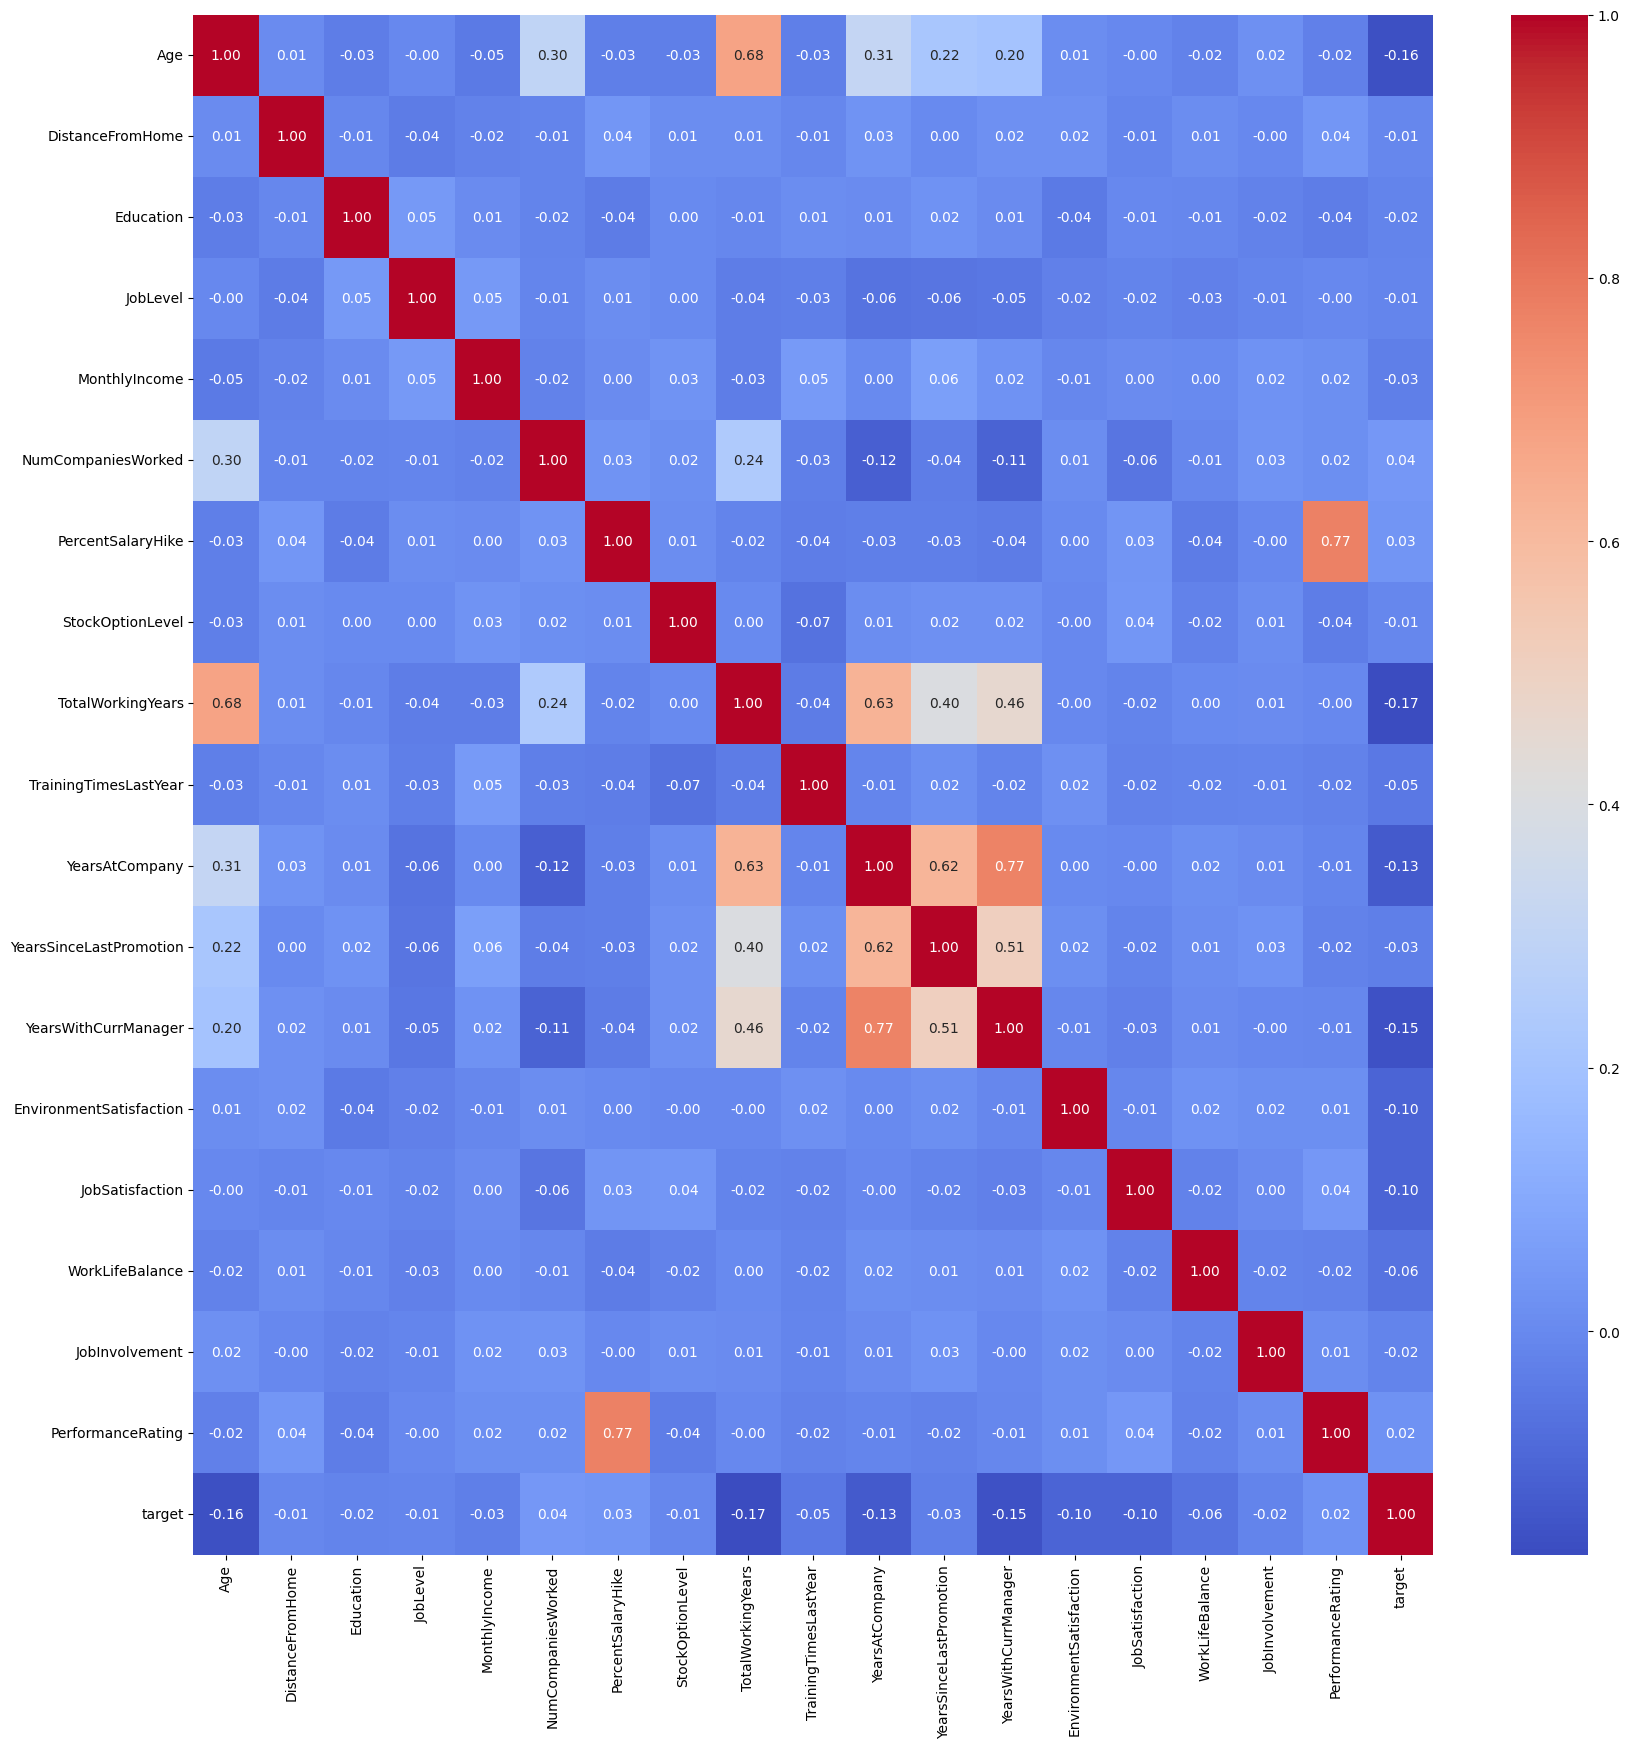

In [6]:
# Matriz de correlación con colores y etiquetas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [7]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,target
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4357.000000,4362.000000,4345.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,2.063898,65061.702419,2.693291,15.210634,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198,2.723434,2.728106,2.761105,2.730488,3.154039,0.160885
std,9.137272,8.105396,1.024728,1.106115,47142.310175,2.497832,3.663007,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674,1.093404,1.101742,0.707111,0.710682,0.361028,0.367467
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,3.000000,83790.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4382 entries, 1 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   BusinessTravel           4382 non-null   object 
 2   Department               4382 non-null   object 
 3   DistanceFromHome         4382 non-null   int64  
 4   Education                4382 non-null   int64  
 5   EducationField           4382 non-null   object 
 6   Gender                   4382 non-null   object 
 7   JobLevel                 4382 non-null   int64  
 8   JobRole                  4382 non-null   object 
 9   MaritalStatus            4382 non-null   object 
 10  MonthlyIncome            4382 non-null   int64  
 11  NumCompaniesWorked       4382 non-null   float64
 12  PercentSalaryHike        4382 non-null   int64  
 13  StockOptionLevel         4382 non-null   int64  
 14  TotalWorkingYears        4382

Gráficos de variables

In [10]:
for i in valor:
    print(df.value_counts(i))
    print("----------------")

Age
35    233
34    231
31    206
36    205
29    202
32    182
30    179
38    173
33    173
40    168
37    148
27    143
28    142
42    137
39    125
45    123
41    119
26    116
44     99
46     99
43     95
50     90
24     78
25     78
49     72
47     71
55     66
51     57
53     57
48     57
54     54
52     53
22     47
23     42
58     42
56     41
21     39
20     33
59     30
19     27
18     23
60     15
57     12
Name: count, dtype: int64
----------------
BusinessTravel
Travel_Rarely        3109
Travel_Frequently     825
Non-Travel            448
Name: count, dtype: int64
----------------
Department
Research & Development    2865
Sales                     1330
Human Resources            187
Name: count, dtype: int64
----------------
DistanceFromHome
2     627
1     622
10    258
9     253
7     252
3     248
8     239
5     192
4     190
6     177
16     95
11     87
24     84
29     81
23     80
18     78
15     78
25     75
26     75
20     74
28     67
19     66
14 

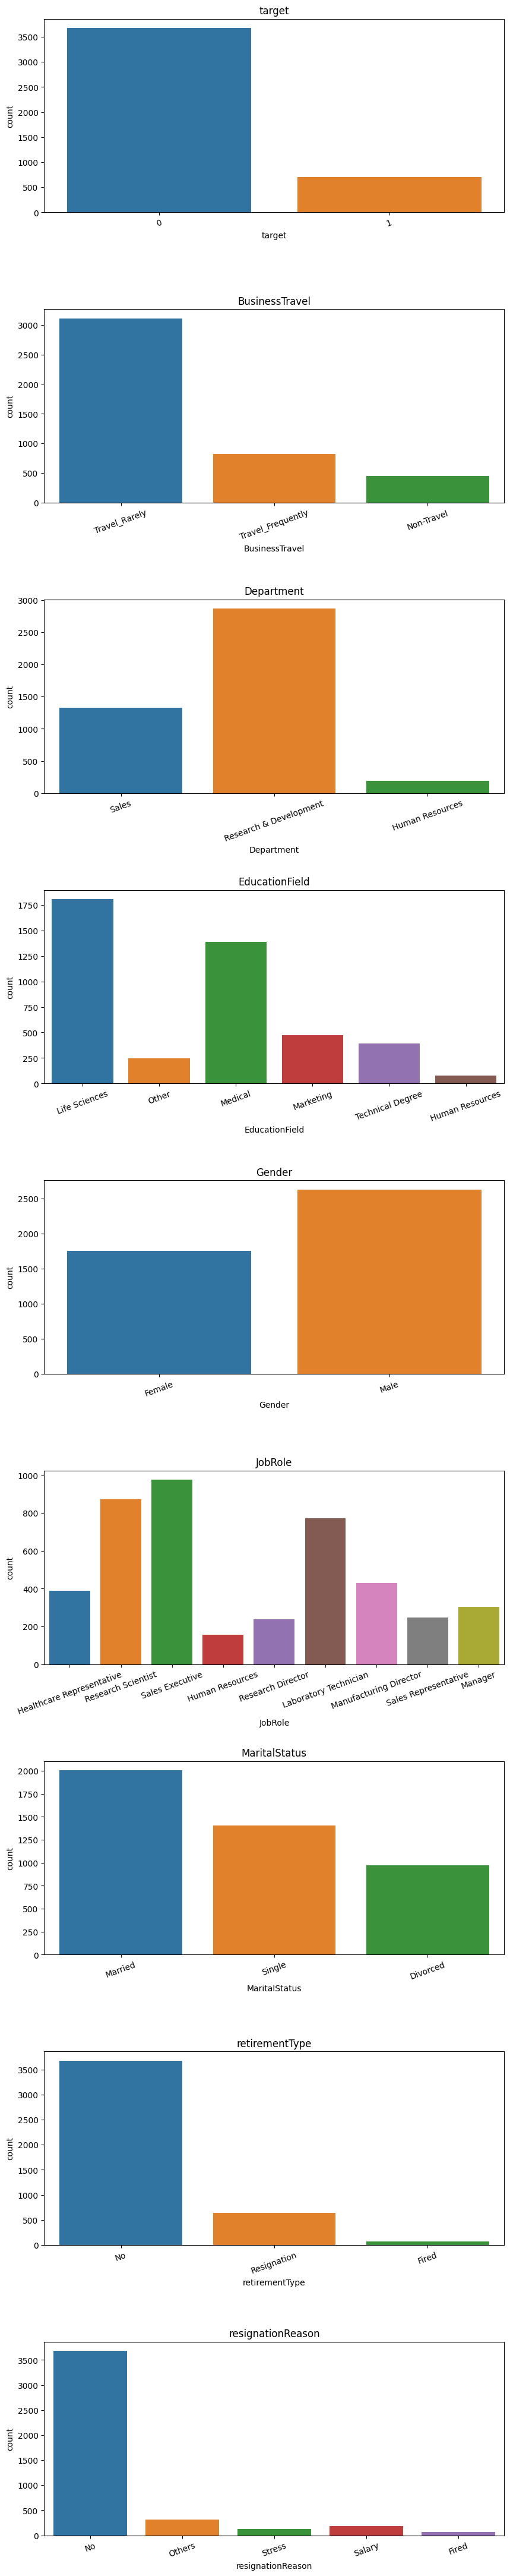

In [12]:
categoricas = [
    "target",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    # "retirementDate",
    "retirementType",
    "resignationReason",
]


# Realizamos gráficos de barras para el conteo de categorías

fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10, 55))
fig.subplots_adjust(hspace=0.5)

for i, colum in enumerate(categoricas):
    sns.countplot(x=colum, data=df, ax=ax[i])
    ax[i].set_title(colum)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=20)

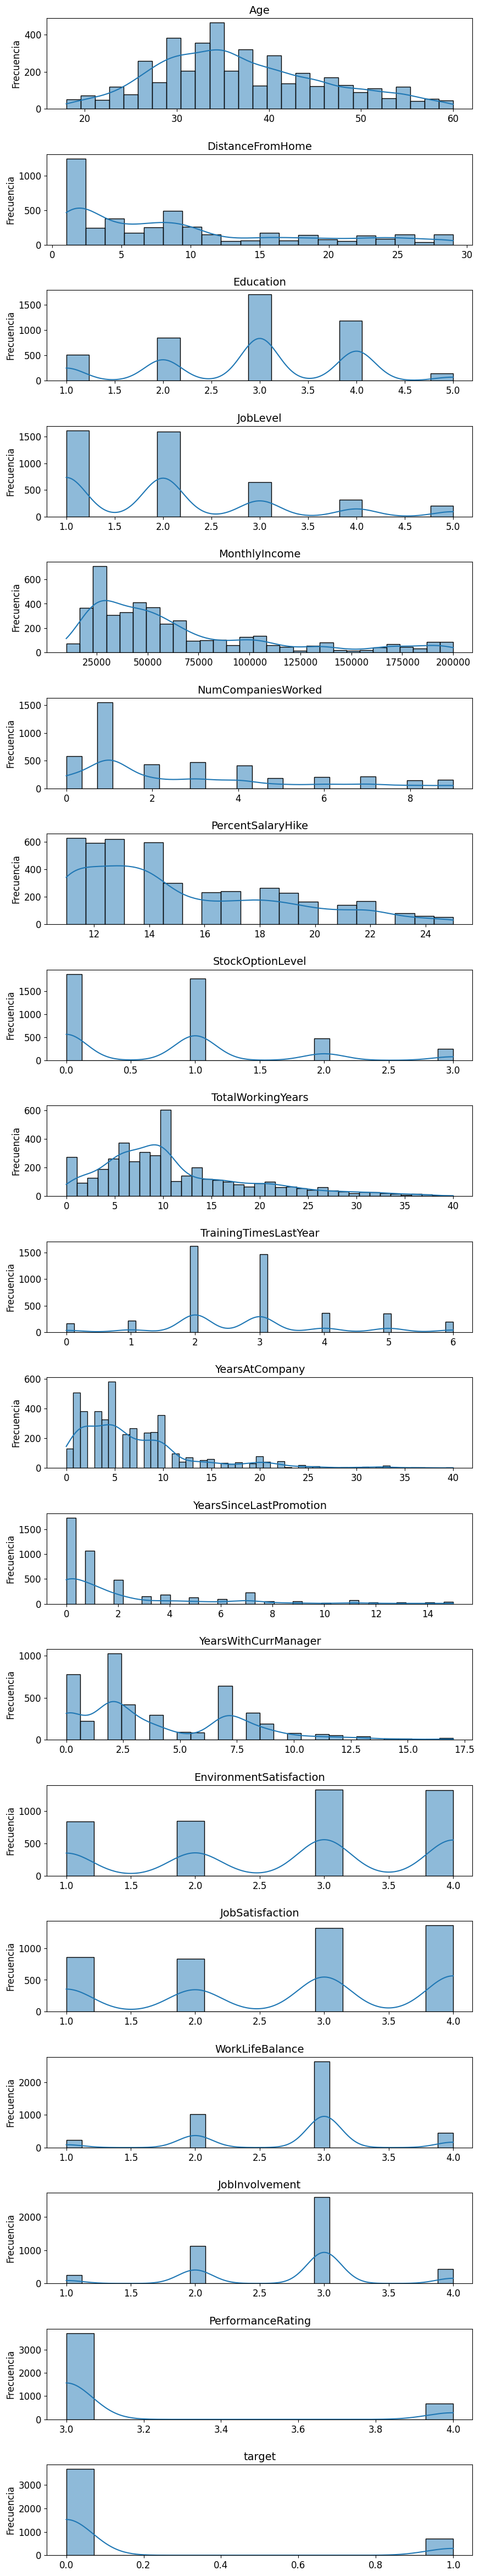

In [13]:
numericas = [
    "Age",
    "DistanceFromHome",
    "Education",
    "JobLevel",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "StockOptionLevel",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement",
    "PerformanceRating",
    "target",
]

fig, ax = plt.subplots(nrows=len(numericas), ncols=1, figsize=(10, 60))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numericas):
    sns.histplot(x=column, data=df, ax=ax[i], kde=True)
    ax[i].set_title(column, fontsize=14)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Frecuencia", fontsize=12)
    ax[i].tick_params(axis="both", labelsize=12)

plt.show()